# <center><font color=purple>5709 Project</font>  </center>

# <center><font color=purple>Name</font>  </center>

# <center><font color=purple>Crop Yield Data Analysis Using Tableau and Python</font>  </center>

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/srisairesu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Import and code data
CropYieldData = pd.read_csv("crop_yield.csv")
CropYieldData

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [3]:
CropYieldData.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [4]:
CropYieldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [5]:
# Counting no.of null values in each column
CropYieldData.isna().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [6]:
# including temperature data, source: https://climateknowledgeportal.worldbank.org/country/india/climate-data-historical

# Define the state and temperature data
states = [
    'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
    'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
    'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
    'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
    'Uttarakhand', 'West Bengal'
]

temperatures = [
    27.24, 28.10, 19.26, 23.48, 25.64, 23.59, 26.18, 26.99, 27.33, 25.48, 26.66, 27.35, 25.28, 8.78, 3.22, 25.27, 26.04,
    26.45, 27.79, 25.95, 26.88, 20.54, 22.24, 22.70, 20.00, 26.22, 28.89, 24.36, 26.27, 6.00, 27.72, 27.82, 25.11, 25.91,
    14.06, 25.93
]

# Create a DataFrame with this data
temperature_df = pd.DataFrame({
    'State': states,
    'Annual Average Temperature': temperatures
})

# Combine with the main CropYieldData using 'State' as the key
CropYieldData = CropYieldData.merge(temperature_df, on='State')

CropYieldData


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Annual Average Temperature
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,23.48
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,23.48
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,23.48
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,23.48
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,23.48
...,...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000,20.00
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000,20.00
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000,3.22
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667,3.22


In [7]:
# Including Climite Data, source: https://weatherandclimate.com/india

# Mapping of states to climate classifications
climate_data = {
    'State': [
        'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
        'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
        'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
        'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
        'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Ladakh'
    ],
    'Climatic Classification': [
        'Tropical monsoon', 'Tropical savanna', 'Humid subtropical', 'Humid subtropical', 'Humid subtropical', 'Humid subtropical',
        'Tropical savanna', 'Tropical savanna', 'Tropical savanna', 'Humid subtropical', 'Tropical monsoon', 'Arid steppe', 'Humid subtropical',
        'Highland temperate', 'Humid subtropical', 'Humid subtropical', 'Arid steppe', 'Tropical savanna', 'Tropical savanna',
        'Tropical savanna', 'Arid steppe', 'Humid subtropical', 'Humid subtropical', 'Humid subtropical', 'Humid subtropical', 'Tropical savanna',
        'Tropical savanna', 'Humid subtropical', 'Arid steppe', 'Tundra', 'Tropical savanna', 'Tropical savanna', 'Humid subtropical',
        'Mediterranean', 'Highland temperate', 'Tropical savanna', 'Cold subarctic'
    ]
}


# Turn it into a DataFrame
climate_df = pd.DataFrame(climate_data)

# Merge it with main data
CropYieldData = CropYieldData.merge(climate_df, on='State', how='left')

CropYieldData

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Annual Average Temperature,Climatic Classification
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,23.48,Humid subtropical
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,23.48,Humid subtropical
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,23.48,Humid subtropical
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,23.48,Humid subtropical
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,23.48,Humid subtropical
...,...,...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000,20.00,Humid subtropical
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000,20.00,Humid subtropical
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000,3.22,Humid subtropical
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667,3.22,Humid subtropical


In [8]:
# Counting no.of null values in each column
CropYieldData.isna().sum()

Crop                          0
Crop_Year                     0
Season                        0
State                         0
Area                          0
Production                    0
Annual_Rainfall               0
Fertilizer                    0
Pesticide                     0
Yield                         0
Annual Average Temperature    0
Climatic Classification       0
dtype: int64

In [9]:
CropYieldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crop                        19689 non-null  object 
 1   Crop_Year                   19689 non-null  int64  
 2   Season                      19689 non-null  object 
 3   State                       19689 non-null  object 
 4   Area                        19689 non-null  float64
 5   Production                  19689 non-null  int64  
 6   Annual_Rainfall             19689 non-null  float64
 7   Fertilizer                  19689 non-null  float64
 8   Pesticide                   19689 non-null  float64
 9   Yield                       19689 non-null  float64
 10  Annual Average Temperature  19689 non-null  float64
 11  Climatic Classification     19689 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.8+ MB


In [10]:
# Apply log transformation for skewed columns

# List of columns to transform
columns_to_log = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

# Apply log1p (log(1 + x)) to avoid log(0) errors
for col in columns_to_log:
    CropYieldData[f'Log_{col}'] = np.log1p(CropYieldData[col])

CropYieldData

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Annual Average Temperature,Climatic Classification,Log_Area,Log_Production,Log_Annual_Rainfall,Log_Fertilizer,Log_Pesticide,Log_Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,23.48,Humid subtropical,11.209317,10.945688,7.626765,15.764969,10.038164,0.585610
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,23.48,Humid subtropical,8.800566,8.452335,7.626765,13.356082,7.629718,0.536748
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,23.48,Humid subtropical,6.680855,3.135494,7.626765,11.235277,5.512461,0.213766
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,23.48,Humid subtropical,9.886189,18.658949,7.626765,14.441803,8.715119,8.563896
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,23.48,Humid subtropical,7.461640,6.678342,7.626765,12.016736,6.291736,0.351297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000,20.00,Humid subtropical,8.294300,7.601402,7.312553,12.887150,7.057037,0.405465
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000,20.00,Humid subtropical,6.908755,8.006701,7.312553,11.500863,5.673323,1.386294
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000,3.22,Humid subtropical,12.647175,12.996576,7.213179,17.202837,11.475999,0.826366
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667,3.22,Humid subtropical,12.527239,8.610501,7.213179,17.082900,11.356064,0.016529


In [11]:
# Saving the Preprocessed data

CropYieldData.to_csv('PreprocessedCropYieldData.csv', index=False)

CropYieldData.to_excel('PreprocessedCropYieldData.xlsx', index=False)

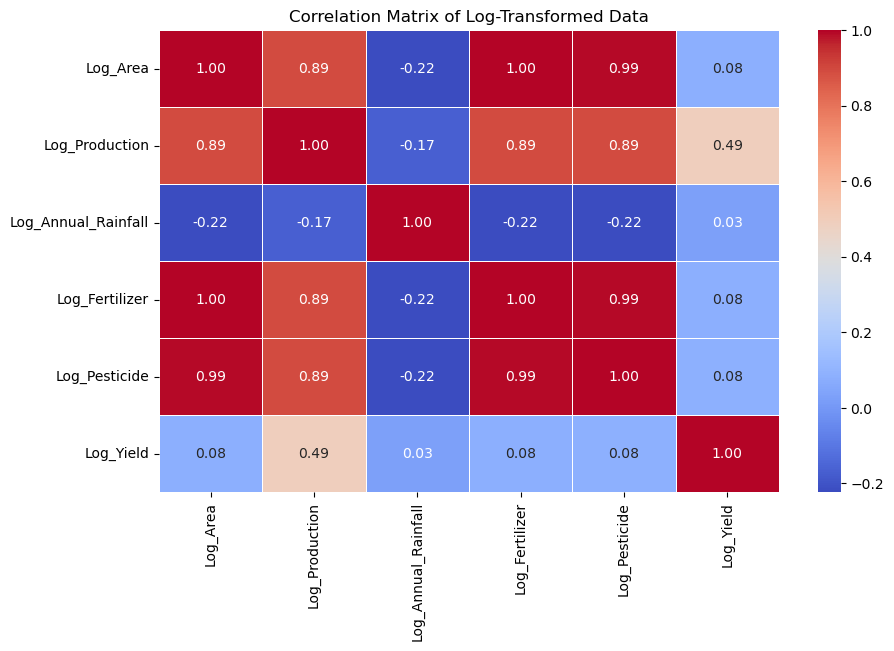

In [12]:
# Finding correlation between numerical columns

# Selecting only the log-transformed numeric columns for correlation
log_columns = ['Log_Area', 'Log_Production', 'Log_Annual_Rainfall', 'Log_Fertilizer', 'Log_Pesticide', 'Log_Yield']

# Calculate the correlation matrix for the log-transformed data
correlation_matrix = CropYieldData[log_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Log-Transformed Data')
plt.show()

/Users/srisairesu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/srisairesu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/srisairesu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/srisairesu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

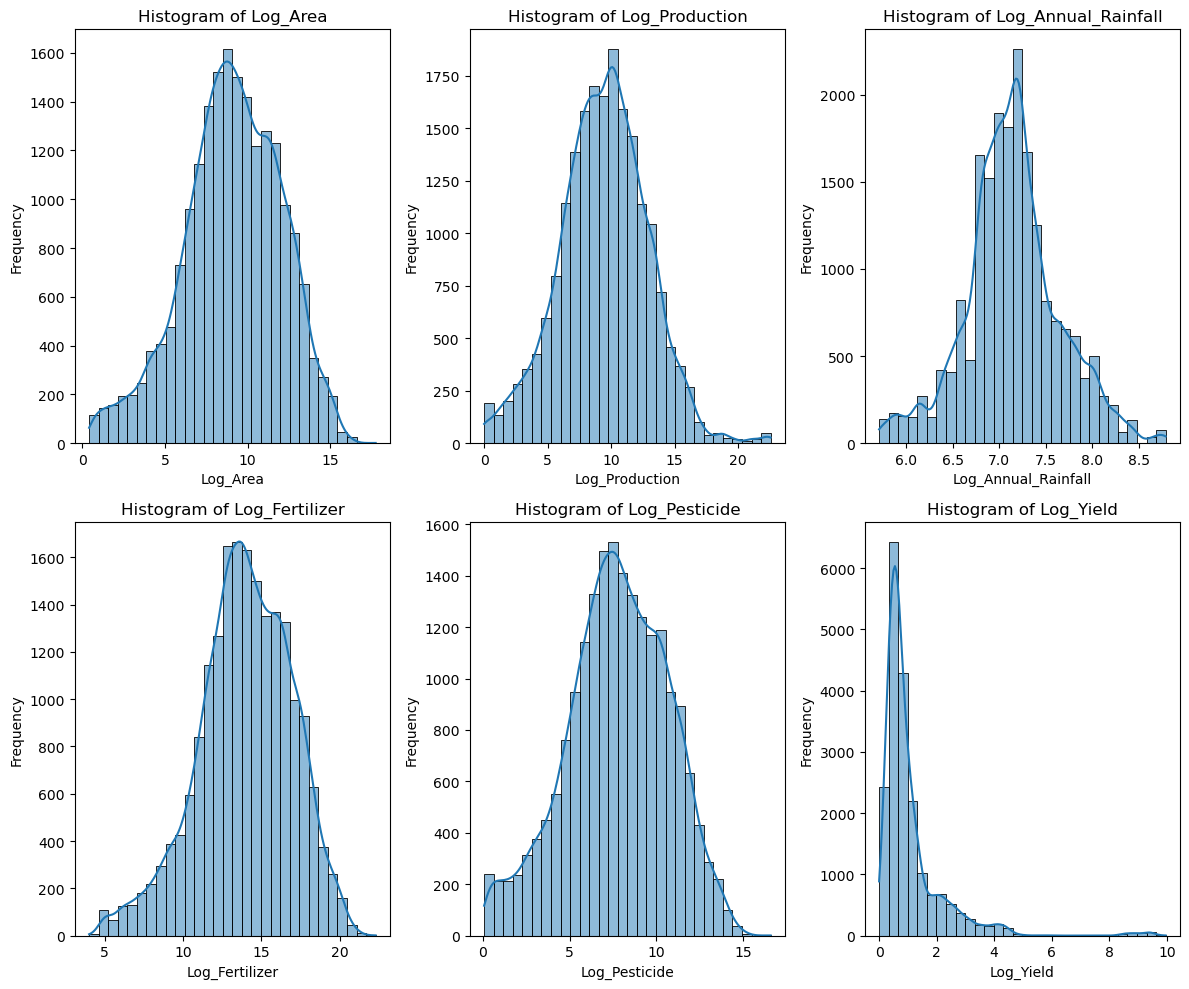

In [13]:
# Creating Histograms to View Skewness of Numerical Columns

# List of log-transformed numeric columns
log_columns = ['Log_Area', 'Log_Production', 'Log_Annual_Rainfall', 'Log_Fertilizer', 'Log_Pesticide', 'Log_Yield']

# Create histograms for each of the log-transformed columns
plt.figure(figsize=(12, 10))

for i, col in enumerate(log_columns, 1):
    plt.subplot(2, 3, i)  # Arrange histograms in a 2x3 grid
    sns.histplot(CropYieldData[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

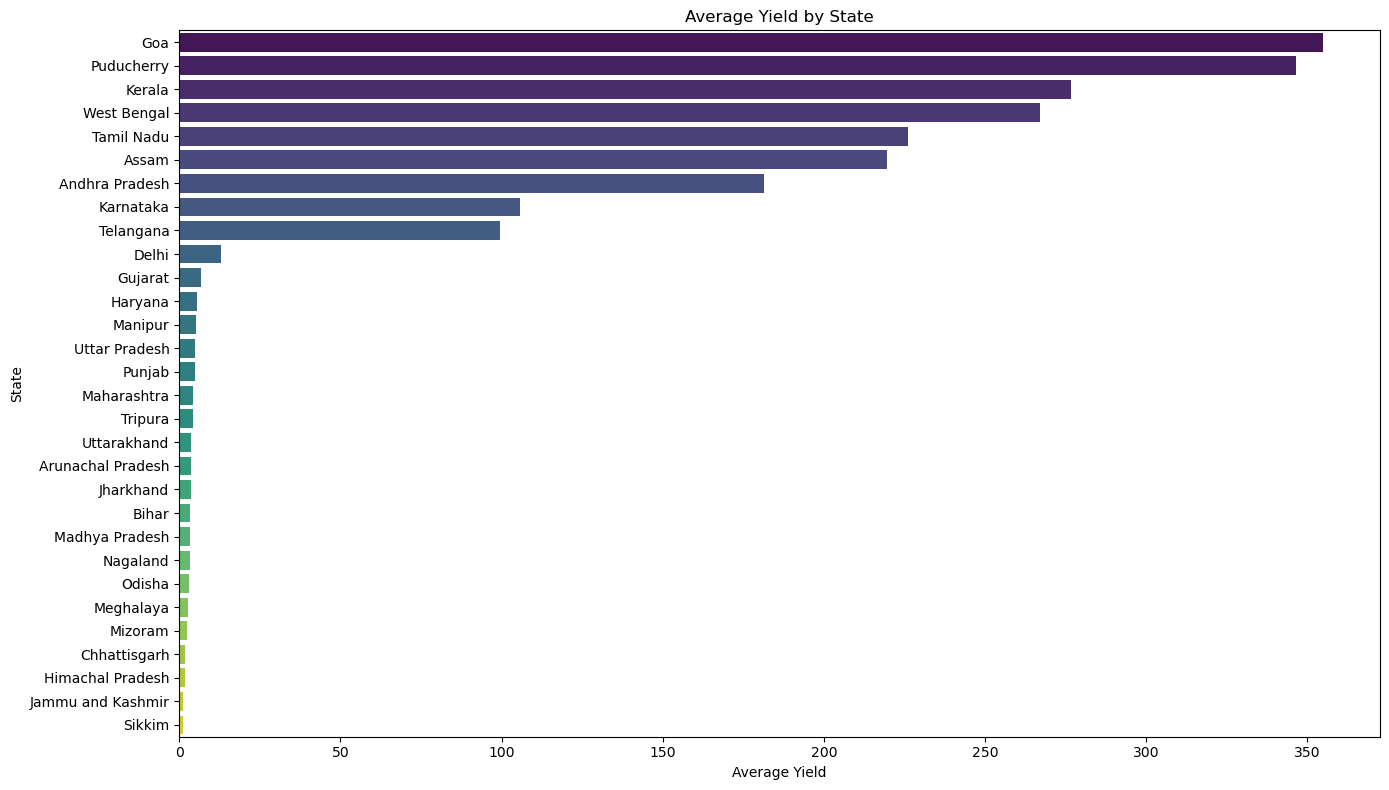

In [14]:
# Bargraph showing yield by state

# Group by State and calculate average yield
state_yield = CropYieldData.groupby('State')['Yield'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x=state_yield.values, y=state_yield.index, palette='viridis')
plt.title('Average Yield by State')
plt.xlabel('Average Yield')
plt.ylabel('State')
plt.tight_layout()
plt.show()

/Users/srisairesu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/srisairesu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


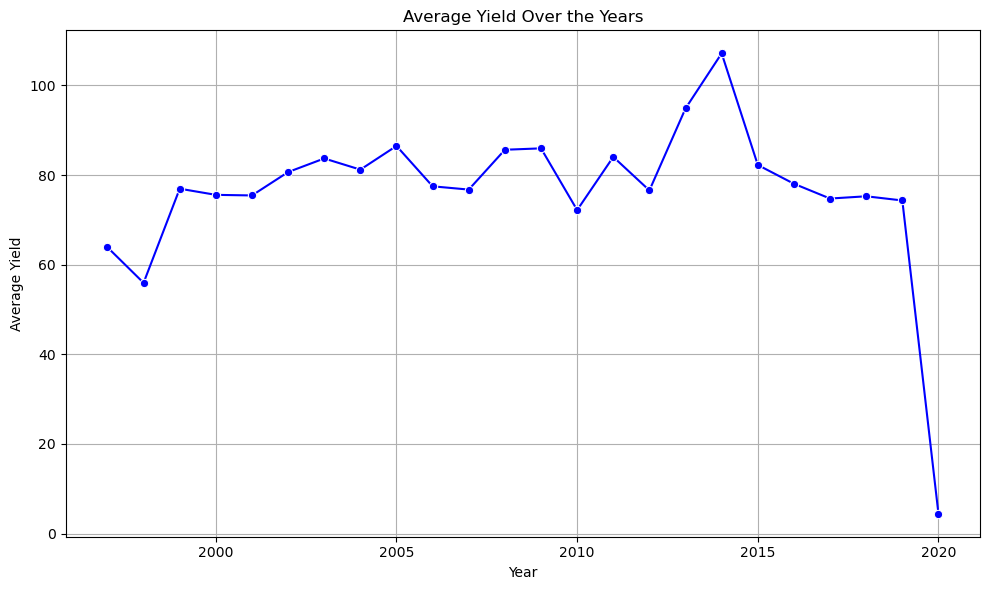

In [15]:
# Linegraph Showing Yield Over the Years

# Group by Year and calculate average yield
yearly_yield = CropYieldData.groupby('Crop_Year')['Yield'].mean()

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_yield.index, y=yearly_yield.values, marker='o', color='b')
plt.title('Average Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.tight_layout()
plt.show()
